The flow should be:
- split the dataset --> to avoid data leakage
- resmapling - oversampling and undersampling

resampling only on the train data to keep the test data as original one maintaining real-world distribution of data.
- Standarise your data
- then do PCA 

Why PCA after resampling, PCA is to get the features covering most variance. If you do PCA before re-sampling the princible components  are computes based on the original data. the re-sampling can affect those principle components.

- Store the pre-processed data in the target folder.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [9]:
data = pd.read_csv("/home/pavithra/projects/spam_or_ham_fsec/Data/train_data.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,304.361,-436.590,-33854.769,-96571.569,-15086.947,-794.409,-442.859,304.248,-202.411,-506.852,...,95.294,-3.936,-251.812,256.429,-473.661,-1398.604,42.638,771.185,-191.123,1356.137
1,54.047,90.087,-154.747,-4116.486,38365.133,-589.309,1115.367,274.199,814.953,167.272,...,-176.341,-426.238,-542.428,99.147,-102.309,-277.948,-98.859,-1163.779,265.231,-992.056
2,272.168,-201.736,4212.592,-9123.655,-35422.458,-1029.249,-506.290,-476.856,-570.731,-161.288,...,321.426,-376.033,142.834,920.958,-122.525,-174.304,-137.612,-1571.473,678.323,1020.263
3,170.007,68.736,48662.079,29735.235,-13903.955,895.081,-257.748,-811.058,-691.561,-31.439,...,-409.919,400.946,313.270,123.172,1786.962,147.637,31.433,-784.719,573.433,1454.415
4,86.797,180.052,-49643.545,2515.406,26206.315,-407.453,-189.416,-53.664,-159.507,-42.291,...,-101.761,-424.898,37.254,-337.431,423.691,14.240,267.352,-234.560,-213.804,873.391


In [10]:
target = pd.read_csv("/home/pavithra/projects/spam_or_ham_fsec/Data/train_labels.csv", header=None)
target.head()

,0
0,1
1,1
2,1
3,1
4,1


In [11]:
target.shape

(3750, 1)

In [13]:
# split the dataset.
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42, stratify=target)
# stratify=target --> makes sure to keep the same class distribution in the train and test target values.


In [16]:
print("the shape of X-train", X_train.shape)
print("the shape of X_test", X_test.shape)

the shape of X-train (3375, 10000)
the shape of X-train (375, 10000)


In [17]:
# Just check the class distribution in the target data.
(y_test.iloc[:,0].value_counts() / y_test.shape[0]) * 100

0
 1    89.866667
-1    10.133333
Name: count, dtype: float64

In [19]:
(y_train.iloc[:,0].value_counts() / y_train.shape[0]) * 100

0
 1    90.014815
-1     9.985185
Name: count, dtype: float64

In [23]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

smote = SMOTE()
model = RandomForestClassifier()
pipeline = Pipeline([('smote', smote), ('classifier', model)])

param_grid = {
    'smote__sampling_strategy': [0.5, 0.7, 1.0],
    'smote__k_neighbors': [3, 5, 7],
}

grid = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)


# ouptut: {'smote__k_neighbors': 7, 'smote__sampling_strategy': 1.0}
# Ran for 25m 19.5s

# I would like to test with sampling_strategy as 0.70 and 1.0 in my along with my model.

/home/pavithra/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/pavithra/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/pavithra/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/pavithra/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'smote__k_neighbors': 7, 'smote__sampling_strategy': 1.0}


In [32]:
# Oversample the minority class which is class_-1.
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, k_neighbors=7, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [33]:
print("X train before re-sampling",X_train.shape)
print((y_train.iloc[:,0].value_counts() / y_train.shape[0]) * 100)
print("X train after re-sampling",X_train_resampled.shape)
print((y_train_resampled.iloc[:,0].value_counts() / y_train_resampled.shape[0]) * 100)


X train before re-sampling (3375, 10000)
0
 1    90.014815
-1     9.985185
Name: count, dtype: float64
X train after re-sampling (4557, 10000)
0
 1    66.666667
-1    33.333333
Name: count, dtype: float64


In [ ]:
# X train before re-sampling (3375, 10000)
# 0
#  1    90.014815
# -1     9.985185
# Name: count, dtype: float64
# X train after re-sampling (4557, 10000)
# 0
#  1    66.666667
# -1    33.333333
# Name: count, dtype: float64

# sampling_strategy = 0.5 means the minority clas will be having half number of samples as the majority class .

# see here majority has 66 and here half is 33 (minority have the 33)

In [36]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.8, random_state=42)

# Apply undersampling to the dataset
X_train_resampled2, y_train_resampled2 = undersampler.fit_resample(X_train_resampled, y_train_resampled)


In [37]:
print("X train before re-sampling",X_train.shape)
print((y_train.iloc[:,0].value_counts() / y_train.shape[0]) * 100)
print("X train after re-sampling",X_train_resampled.shape)
print((y_train_resampled2.iloc[:,0].value_counts() / y_train_resampled2.shape[0]) * 100)


X train before re-sampling (3375, 10000)
0
 1    90.014815
-1     9.985185
Name: count, dtype: float64
X train after re-sampling (4557, 10000)
0
 1    55.5458
-1    44.4542
Name: count, dtype: float64


In [ ]:
# I would like to check, with undersampling and without it.
# Model 1 - oversampling 1.0
# Model 2 - undersampling 20 % and oversampling 0.6
# MOdel 3 - without both

#### What are all the parameters for the pipeline, 
- oversample_sampling_strategy
- undersample_sampling_strategy
- do_oversample (bool)
- do_undersample (bool)

# Standartise

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled2)
X_test_scaled = scaler.transform(X_test)

# PCA

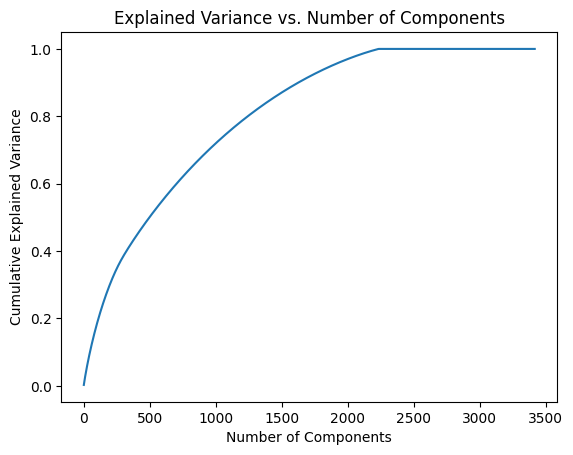

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(X_train_scaled)


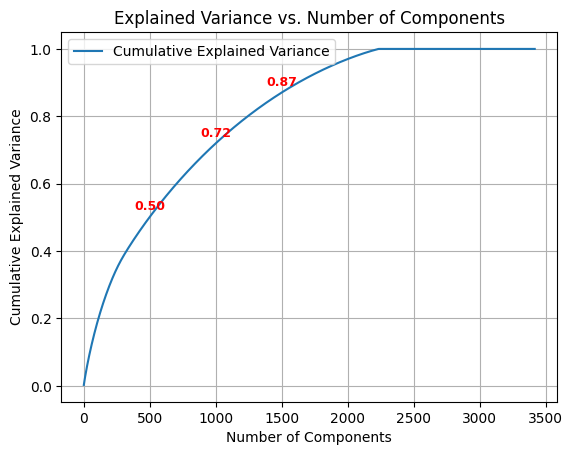

In [43]:


# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create the plot for cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, label='Cumulative Explained Variance')

# Add annotations at x = 1000 and x = 1500
for x_value in [500, 1000, 1500]:
    if x_value <= len(cumulative_variance):
        plt.annotate(f'{cumulative_variance[x_value-1]:.2f}',
                     (x_value, cumulative_variance[x_value-1]),
                     textcoords="offset points",
                     xytext=(0, 5),
                     ha='center',
                     fontsize=9,
                     color='red',
                     weight='bold')

# Adding labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.legend()
plt.show()


In [44]:
n_components = 1000
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [48]:
print("X train ",X_train_pca.shape)
print("X test",X_test_pca.shape)
print("Y_Train", y_train_resampled2.shape)
print("Y_test", y_test.shape)


X train  (3417, 1000)
X test (375, 1000)
Y_Train (3417, 1)
Y_test (375, 1)


In [ ]:
# So the n_components I wanna try is.
# 750, 1000, 1500, 2000

#### The parameters for pipeline
- n_components


# store it in target folder.

In [56]:
#X_train_pca.to_csv("data_x_train.csv")
np.savetxt('data/x_train.csv', X_train_pca, delimiter=',')
np.savetxt('data/x_text.csv', X_test_pca, delimiter=',')
np.savetxt('data/y_train.csv', y_train_resampled2, delimiter=',')
np.savetxt('data/y_test.csv', y_test, delimiter=',')


In [57]:
x_train_loaded = pd.read_csv("/home/pavithra/projects/spam_or_ham_fsec/explore/data/x_train.csv", header=None)

In [58]:
X_train_pca

array([[-2.72282186, -0.14396734,  1.46537291, ..., -0.01365814,
        -0.50245622,  0.02747239],
       [-0.04729483,  3.9861296 , -1.29790711, ...,  0.84493985,
        -0.28843374, -0.74653948],
       [-0.25571668, -0.56130625,  0.66501732, ...,  0.36435428,
        -1.64398554, -0.44564128],
       ...,
       [ 1.0667806 , -0.18528842,  2.50250439, ...,  0.20280469,
         1.00887572,  1.67742332],
       [-1.466999  , -1.82003735, -0.64871619, ...,  3.10091915,
         1.45194063, -1.75858396],
       [ 0.6688073 , -1.16691985,  0.6537029 , ..., -2.30482152,
        -2.43698714,  1.78318377]])

In [59]:
x_train_loaded.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-2.722822,-0.143967,1.465373,2.922359,-3.329331,9.497633,3.807874,-4.941909,-1.999213,-0.445904,...,0.061653,0.235171,0.002323,0.005109,0.203689,-0.419790,0.360375,-0.013658,-0.502456,0.027472
1,-0.047295,3.986130,-1.297907,1.360974,-3.319875,-2.133367,2.775187,-0.529848,0.044781,-2.920641,...,-0.353586,0.890085,0.400513,0.336349,-0.465252,0.052148,0.023827,0.844940,-0.288434,-0.746539
2,-0.255717,-0.561306,0.665017,-1.410250,1.008827,0.900971,1.927586,-1.547472,-0.261180,-0.583696,...,0.756371,1.228188,0.880052,-2.171151,-0.939194,-1.156686,-0.936798,0.364354,-1.643986,-0.445641
3,-0.208782,-1.251495,2.886891,-2.518949,-1.525051,-0.719381,0.912847,-1.859721,-1.013575,-1.805792,...,-0.091333,-0.500582,0.294633,0.099416,-0.394393,-0.155131,-0.042862,0.423300,0.048950,0.449728
4,-3.319967,-2.763397,0.184637,-0.219865,0.924202,-2.354977,-1.116149,-0.658522,4.266022,0.025824,...,0.471622,0.410652,-0.101796,0.543173,0.492086,-0.826946,0.013545,-0.501023,-0.774756,0.237926
